In [2]:
using DelimitedFiles
using SparseArrays
using LinearAlgebra
using NLopt
using PyPlot
using KrylovKit
using FiniteDifferences
using Statistics
using Revise
using TopologyOptimizationHelper

In [3]:
LDOS_vals = readdlm("pengning_mod_LDOS_vals.txt")
Q_vals = readdlm("pengning_mod_Qs.txt")
ρ_init = readdlm("penging_rho_init.txt ")
mod_ρ_opt = readdlm("penging_mod_rho_opt.txt");

In [4]:
rc("font", family="serif", serif="Times New Roman")
rc("mathtext", fontset="cm")
rc("xtick", labelsize=11.5)  # x-axis tick labels
rc("ytick", labelsize=12)  # y-axis tick labels

In [5]:
Lx = Ly = 4
ω = 2π
res = 40
ρ = zeros(120, 120)
ρ = pad_matrix(ρ, 2, 2, 0; resolution=res)
offset = -round(Int, res * (0.2 + 1.5))
N, M = size(ρ)
b = zeros(N, M)
b[N÷2 + offset, M÷2] = 1;

In [6]:
function make_smooth_plot(lst)
    current = lst[1]
    output = Float64[current]
    for i in 2:length(lst)
        lst_i = lst[i]
        if lst_i > current
            current = lst_i
        end

        push!(output, current)
    end

    return output
end

make_smooth_plot (generic function with 1 method)

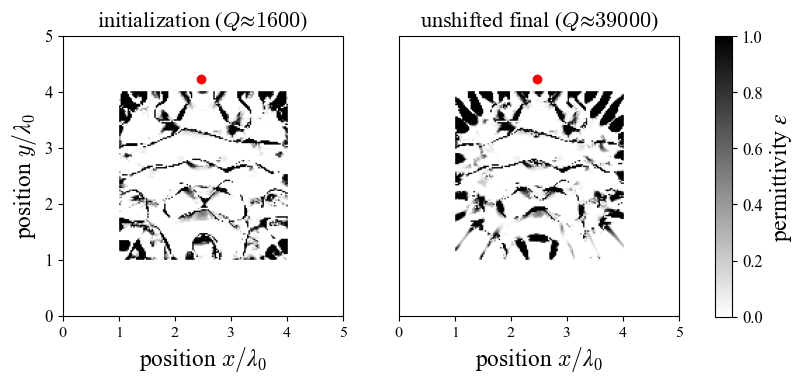

In [7]:
figure(figsize=(8.5, 4))  # Slightly wider to accommodate colorbar

subplot(1, 2, 1)
im1 = imshow(ρ_init, extent=(0, 5, 0, 5), cmap="gray_r", vmin=0, vmax=1)
plot(5(M÷2 - 1)/M, 5 - 5(N÷2 + offset - 1)/N, "ro")
xlabel(L"position $x / λ_0$", fontsize=17)
ylabel(L"position $y / λ_0$", fontsize=17)
ytick = gca().get_yticks()
title(L"initialization ($Q ≈ 1600$)", fontsize=16)

subplot(1, 2, 2)
im2 = imshow(mod_ρ_opt, extent=(0, 5, 0, 5), cmap="gray_r", vmin=0, vmax=1)
plot(5(M÷2 - 1)/M, 5 - 5(N÷2 + offset - 1)/N, "ro")
xlabel(L"position $x / λ_0$", fontsize=17)
yticks([])
title(L"unshifted final ($Q ≈ 39000$)", fontsize=16)

# Adjust subplot spacing to make room for colorbar
subplots_adjust(right=0.85)

# Add colorbar to the figure
cax = gcf().add_axes([0.893, 0.1425, 0.02, 0.70125])  # [left, bottom, width, height]
cbar = colorbar(im2, cax=cax)
cbar.set_label(L"permittivity $ε$", fontsize=17)

In [8]:
A, x, y = Maxwell2d(Lx, Ly, (5 + 1e-4im)mod_ρ_opt .+ 1, ω; resolution=res)
@show outside_mod_ω₀_opt = sqrt(Arnoldi_eig(A, vec((5 + 1e-4im)mod_ρ_opt .+ 1), ω, vec(b))[1])

outside_mod_ω₀_opt = sqrt((Arnoldi_eig(A, vec((5 + 0.0001im) * mod_ρ_opt .+ 1), ω, vec(b)))[1]) = 6.283185307179643 - 8.153117358353373e-5im


6.283185307179643 - 8.153117358353373e-5im

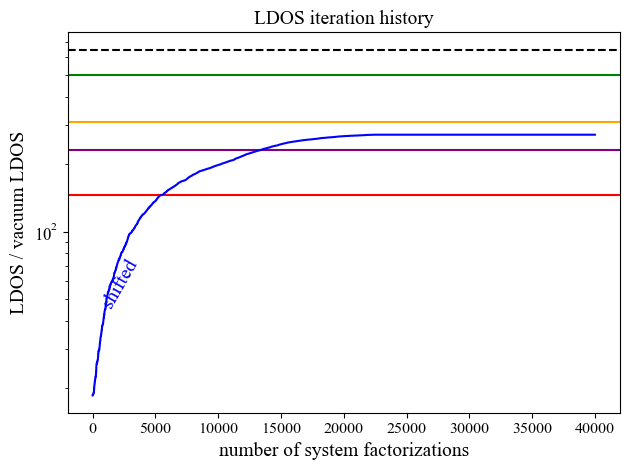

In [7]:
title("LDOS iteration history", fontsize=14)
ylabel("LDOS / vacuum LDOS", fontsize=14)
xlabel("number of system factorizations", fontsize=14)
axhline(y=649, color="black", linestyle="--")
axhline(y=500, color="green")
axhline(y=308, color="orange") 
axhline(y=231, color="purple") 
axhline(y=146, color="red")
semilogy(make_smooth_plot(LDOS_vals), color="blue")


text(500, 46, "shifted", color="blue", fontsize=14, rotation=60)

tight_layout()

In [8]:
maximum(LDOS_vals)

270.60462126702987